In [1]:
import pandas as pd
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

import numpy as np

In [2]:
import os
dirname = os.getcwd()
parent_dirname = os.path.dirname(dirname)

In [3]:
# Read in price data
df = pd.read_csv(os.path.join(parent_dirname, 'data/raw/dji_sti_adj_price_daily.csv'),
                 parse_dates=True, 
                 index_col="Date")

In [4]:
# Calculate daily returns
# ret = (df - df.shift()) / df.shift()
ret = np.log(df) - np.log(df.shift())
# do not drop NA

In [5]:
# remove STI
# ret = ret.drop('^STI', axis=1)

In [6]:
# Calculate mean and covariance of daily log return
mu = ret.mean() * 60
S = ret.cov() * 60

In [7]:
# Plot the portfolios
plot_df = pd.DataFrame({'mu':mu, 'S':np.sqrt(np.diag(S))})

In [8]:
plot_df

,mu,S
A17U.SI,0.044421,0.065187
AAPL,0.127855,0.136357
AXP,0.053695,0.092171
BA,0.024113,0.146808
BN4.SI,0.045942,0.103297
BS6.SI,0.011357,0.197447
C07.SI,-0.019631,0.110379
C09.SI,0.066975,0.098909
C31.SI,0.070735,0.075536
C38U.SI,0.019054,0.080725


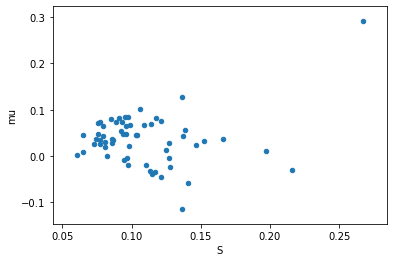

In [9]:
plot_df.plot.scatter(x='S', y='mu')

In [10]:
# Calculate correlation
r = ret.corr()
# r

In [11]:
# Portfolio analysis
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))

In [12]:
# optimize wrt max sharpe ratio
raw_weights = ef.max_sharpe(risk_free_rate=0.02)
cleaned_weights = ef.clean_weights()

In [13]:
# View clean weights
cleaned_weights

{'A17U.SI': 0.04489,
 'AAPL': 0.0786,
 'AXP': 0.0,
 'BA': 0.0,
 'BN4.SI': 0.0,
 'BS6.SI': 0.0,
 'C07.SI': 0.0,
 'C09.SI': 0.0,
 'C31.SI': 0.03748,
 'C38U.SI': 0.0,
 'C52.SI': 0.0,
 'C61U.SI': 0.0,
 'C6L.SI': 0.0,
 'CAT': 0.0,
 'CSCO': 0.0,
 'CVX': 0.0,
 'D01.SI': 0.0,
 'D05.SI': 0.0,
 'DIS': 0.0,
 'DOW': 0.0,
 'E5H.SI': 0.0,
 'F34.SI': 0.15808,
 'G13.SI': 0.0,
 'GS': 0.0,
 'H78.SI': 0.0,
 'HD': 0.0,
 'IBM': 0.0,
 'INTC': 0.0,
 'J36.SI': 0.0,
 'J37.SI': 0.0,
 'JNJ': 0.0,
 'JPM': 0.01676,
 'KO': 0.0,
 'MCD': 0.0,
 'MMM': 0.0,
 'MRK': 0.0,
 'MSFT': 0.02382,
 'N2IU.SI': 0.14109,
 'NKE': 0.0,
 'O39.SI': 0.0,
 'PFE': 0.0,
 'PG': 0.14134,
 'S58.SI': 0.0,
 'S63.SI': 0.0,
 'S68.SI': 0.16743,
 'T39.SI': 0.0,
 'TRV': 0.0,
 'U11.SI': 0.0,
 'U14.SI': 0.00908,
 'U96.SI': 0.0,
 'UNH': 0.0,
 'UTX': 0.0,
 'V': 0.0,
 'V03.SI': 0.0,
 'VZ': 0.0,
 'WBA': 0.0,
 'WMT': 0.06562,
 'XOM': 0.0,
 'Y92.SI': 0.10079,
 'Z74.SI': 0.01502}

In [14]:
ef.portfolio_performance(verbose=True)

Expected annual return: 9.9%
Annual volatility: 4.9%
Sharpe Ratio: 1.61


(0.09938310382041578, 0.049245815091253656, 1.6119766455955091)

In [15]:
# how much of each stock to buy?
capital = 10000

from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)

da = DiscreteAllocation(raw_weights, latest_prices, total_portfolio_value=capital)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

48 out of 60 tickers were removed
Discrete allocation: {'A17U.SI': 154, 'AAPL': 3, 'C31.SI': 101, 'F34.SI': 377, 'JPM': 1, 'MSFT': 2, 'N2IU.SI': 622, 'PG': 11, 'S68.SI': 185, 'WMT': 6, 'Y92.SI': 1089, 'Z74.SI': 44}
Funds remaining: $0.01
